# CS418 Project: Emotion Classification &emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;   Team: Phoenix

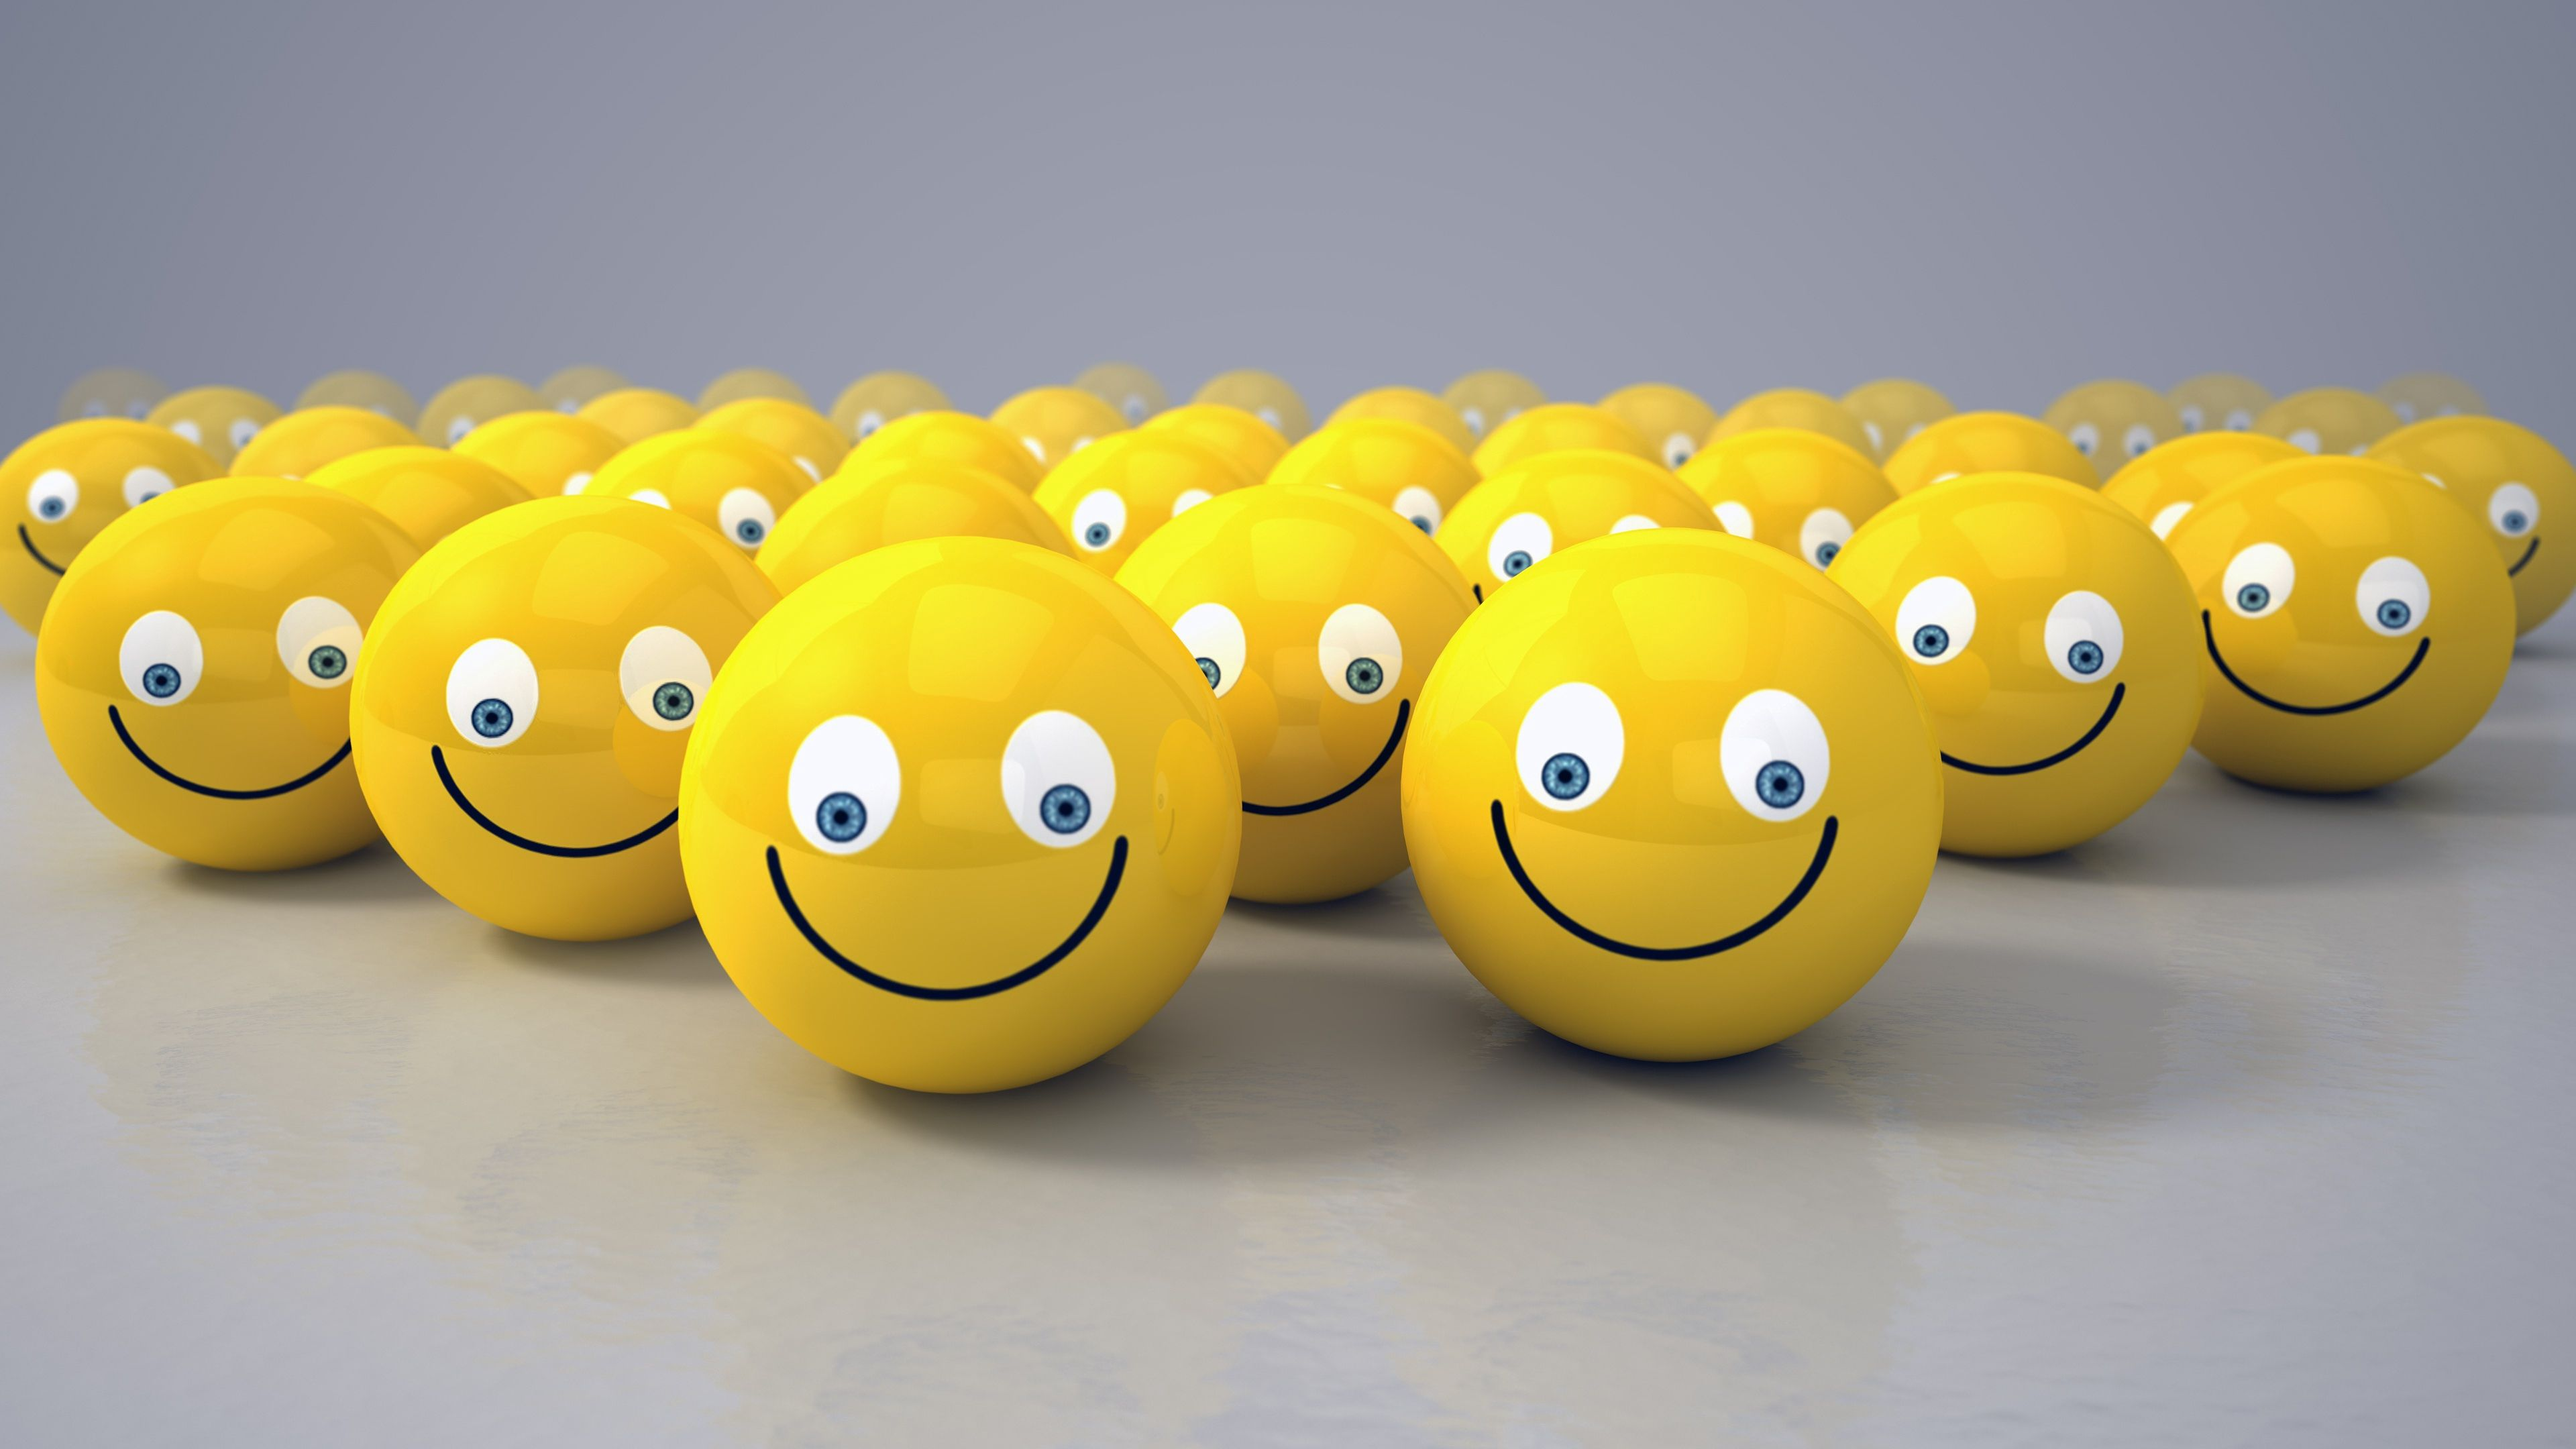

## Project Introduction

- An alternative to binary sentiment analysis where words or sentences are usually labeled as positive or negative, here we will go deeper, trying to predict the emotion that sentence carries.
- We will classify the text/sentences into categories, representing the human emotions.
- Emotion Classification models have a host of applications in Business world, Healthcare and Education. These emotions can offer additional insights or be combined with sentiment analysis or other methods to understand the text better.
- Data: We are using a dataset from kaggle which is a text file containing 20000 rows of sentences, each labeled with one of the emotion categories: anger, sadness, love, fear, joy and surprise.  

## Any changes

- Our problem still remains the same. We are not changing the problem statement or the dataset. 
- During data analysis, we came across one of the emotion class(surprise), which had very few rows of sentences comparative to other emotion classes. Therefore, we have dropped one class during our data cleaning process.
- Addition: Initially, we thought of comparing 2-3 ML algorithms but we are planning to do comparison on 4-5 algorithms.

# Data Cleaning

- Initially, the dataset was in text file. So, at first the data was loaded and put into a dataframe.
- Added heading for the dataframe columns as "Sentence" and "Emotion".
- All the 3 text files(train, text and val) are initially concatenated into same dataframe for easier pre-processing and cleaning.
- Checked the missing value in the dataset.
- Checked the label/class/emotion category distribution. One of the emotion category(surprise) had very few rows of data comparative to other class, therefore we have removed it.
- Since, the labels were text and not numbers. We have encoded these text into numbers using label encoding.
- Coming back to the features, we first remove unrelevant characters, then tokenize the string and convert all the characters to lowercase.
- We also perform stemming to bring down all the words to common base form.
- Once all these operations are applied, we use vectorizer function from scikit learn library to convert a collection of text documents to a matrix of token counts(Document term matrix).
- Finally, we pass the processed data to train test split function to get training and testing data.



## Exploratory data analysis

- Our dataset consist of rows of sentences with labels as one of the emotion category.
- To visualize, most frequent words in the sentences, we have plotted word cloud and also some barplots.
- Word cloud is plotted for each of the emotion class. Word clouds are visual representation of text that give greater rank to words that appear more frequently.
- We have also added a data visualization technique i.e word count. Visualizing word count helps us understand which words contribute the most for a sentence to be classified as a particular label. For example, the word ‘happy’ could be occurring frequently in sentences which are classified as joy. However, sometimes this process is affected by stop words. 
- Stop words are words which occur frequently in a language. For example, ‘and’, ‘or’, ‘was’, etc. Removing these words will not change the semantics of a sentence and help us concentrate more on words that are relevant to the label.
- Here, we use the ‘stopwords’ method provided by the ‘nltk’ library to filter out the most common stop words in English. Apart from this we run the code iteratively and identify other stop words relevant to our data and exclude them too for visualization.


- Observation: Interestingly, we saw few of the most common word in all the classes were same in the wordcloud: really, feel, feeling etc. Also, the most common words other than these words are stopwords among all the classes. We believe, this is normal as almost every sentence have lots of stopwords. During data analysis, we also came across one of the emotion class(surprise), which had very few rows of sentences comparative to other emotion classes. Therefore, we have dropped one class during our data cleaning process.


## Visualization that tests an interesting hypothesis

- Hypothesis: We initially thought that there must be some dependency among the words in the sentences to classify it into one of the emotion. And we cannot classify any sentence based on the occurence of few words. For example: Just appearing "happy" in a sentence does not mean that sentence belongs to 'joy' or 'love' class. It might be the case when a word happy is used in a negative way. For eg: I am not happy today. 
- Therefore, we really need to get context from other words as well. One technique is to visualize ngrams. NGrams is a feature used often in language processing to understand how words when occurring in ordered groups affect the labeling. NGrams is a continuous sequence of n items in a given text or sentence. Here, N is a variable which tells the number of words in the sequence. N=2 means bigrams, N=3 means trigrams and so on.
- Therefore, we have plotted barplots for bigrams for all the classes. 


- Observation: It's very clear from the plots that bigrams give a better picture of emotion. For eg, hurt feelings are in anger class. Therefore, our assumption was right. 



## ML analysis

- We have implemented 3 machine learning models for now: A logistic regression, A decision tree and a K Nearest Neighbour algorithm. For baseline, we will be using logistic regression model. But eventually, we will be comparing all the machine learning models. 
- Results interpretation: Logistic Regression model outperformed other models with an accuracy of 86%. With decision tree we got an accuracy of 81% whereas KNN model gave an accuracy of 67%. It makes sense for KNN model to not perform great as KNN algorithm is a lazy algorithm and it classifies the data based on neighbors without any learning. Confusion matrix, classification report mse and accuracy are shown for all the models.
- mse for train is always lower in all the three models. As the model is trained on training data, it performs better with that against test data.

## Reflection

- Hardest part so far: We believe data cleaning and preprocessing took some time as all these data were in textual format. Also, we learned about converting sentences into document term matrix which we were not aware of.

- Initial insights: We believe we can apply some more preprocessing techniques to make our data better. Also, we have observed that the data is unbalanced from the data distribution. All the learning models performs better with training data but not great with test data.

- Results: Yes, we have showed some results at this point. We implemented 3 ML models for this problem. Logistic Regression model outperformed other models with an accuracy of 86%. With decision tree we got an accuracy of 81% whereas KNN model gave an accuracy of 67%.

- Current biggest problem: We are not facing any big problem as such but there are few minor problems which we will be taking care of like fixing data distribution, identifying better algorithm etc.

- Track: Yes, we are on track.

- Worth proceeding this project: Definitely, yes. We are learning lot of stuffs while doing this project. We had no idea of converting text documents to numbers and apply ML on those data. Also, this project is helping us in building a data science project from scratch which will be useful in future.


## Next Steps

- Our next plan is to identify some more ML algorithm which will perform better than the current algorithms.
- We also plan to do some data scaling before passing it to any model and check the accuracy.
- We also plan to explore some data balancing techniques and apply those to balance our dataset.
- We even thought of exploring neural network and implement one of the algorithm for this task.
- These are few things which we have in mind right now, of course we will add some more.

In [3]:
# import libraries required for this project

import re
import nltk
import pandas as pd
import numpy as np
import string
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from sklearn import preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score, confusion_matrix
from sklearn import svm
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

## Data Loading, Cleaning and Exploratory Data Analysis

In [4]:
# The dataset is in text format, so converting that to dataframe for easier manipulation
def convert_text_to_df(filename):
    
    with open(filename) as file:
        lines = file.readlines()
    
    file.close()   
    df = pd.DataFrame(columns = ['Sentence', 'Emotion'])

    for line in lines:
        x = line.split(';')
        df = df.append({'Sentence' : x[0], 'Emotion' : x[1].strip()}, ignore_index = True)
    
    return df

df_train = convert_text_to_df('train.txt')
df_test = convert_text_to_df('test.txt')
df_val = convert_text_to_df('val.txt')

# Concat all data together for easier preprocessing
df = pd.concat([df_train, df_test, df_val])

In [5]:
df.head()

,Sentence,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [6]:
df.describe()

,Sentence,Emotion
count,20000,20000
unique,19948,6
top,i feel a remembrance of the strange by justin ...,joy
freq,2,6761


In [7]:
df.isnull().sum() #check missing value

Sentence    0
Emotion     0
dtype: int64

In [8]:
df['Emotion'].value_counts()

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: Emotion, dtype: int64

In [9]:
df.shape

(20000, 2)

In [10]:
# Removing Surprise class
df = df[df['Emotion'] != 'surprise']
df['Emotion'].value_counts()

joy        6761
sadness    5797
anger      2709
fear       2373
love       1641
Name: Emotion, dtype: int64

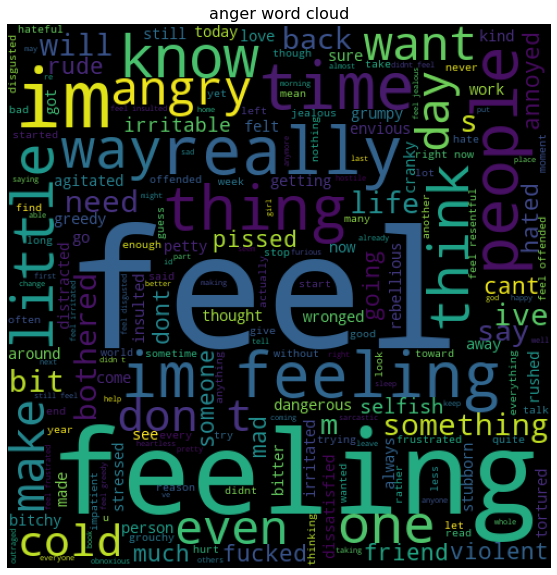

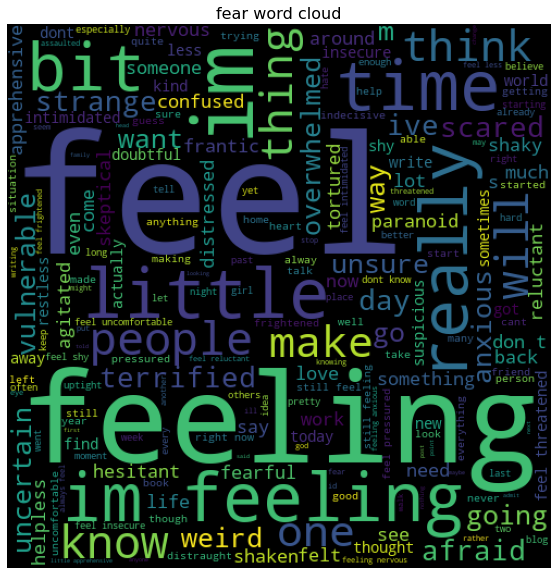

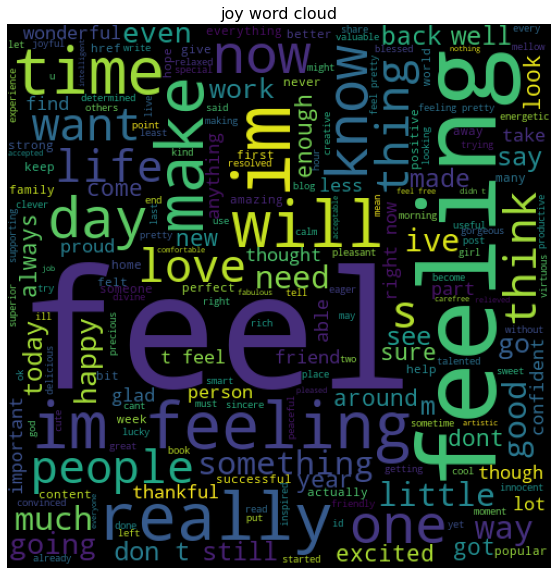

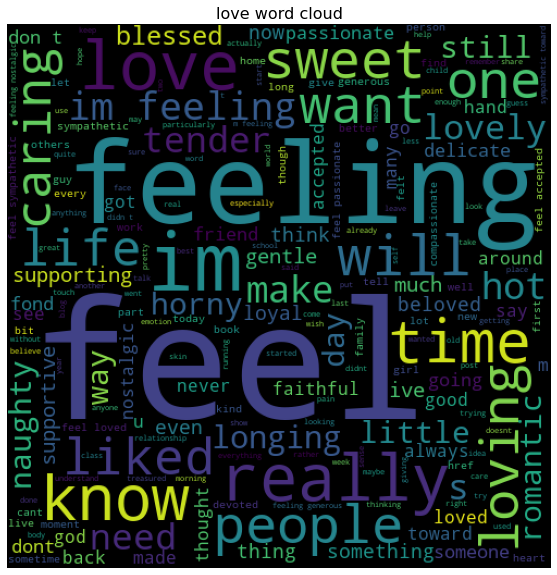

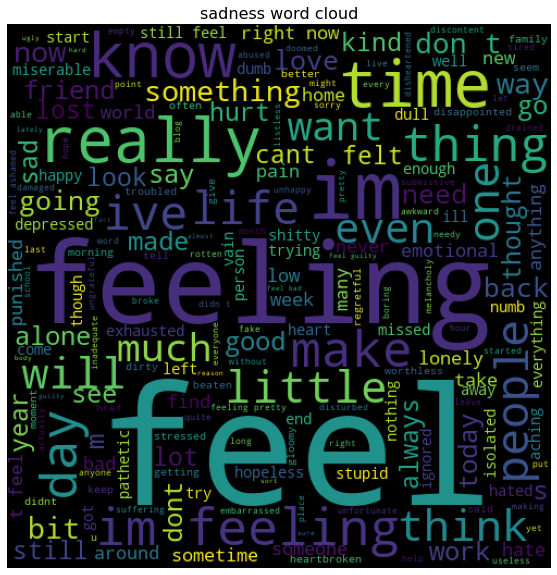

In [11]:
# Create a word cloud draw function
def word_cloud(wc, df):
    plt.figure(figsize=(10,10))
    plt.title(df+' word cloud', size=16)
    plt.imshow(wc)
    plt.axis('off')

emotion_label_list = ['anger', 'fear', 'joy', 'love', 'sadness']
complete_text_input = ""

for emotion in emotion_label_list:
    text_input = ' '.join([text for text in df.loc[df['Emotion'] == emotion,'Sentence']])
    wc = WordCloud(width=500, height=500).generate(text_input)
    word_cloud(wc, emotion)
    complete_text_input += text_input

    

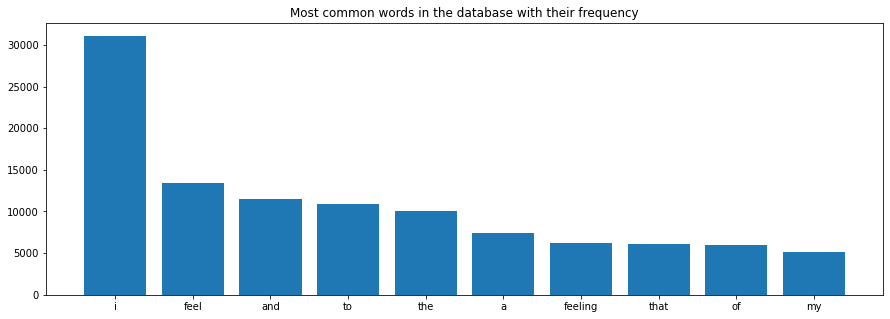

In [12]:
# Plotting most common words in the database with their frequency
text_list = complete_text_input.split()

word_data = Counter(text_list).most_common(10)

plt.figure(figsize=(15, 5))
plt.bar(*zip(*word_data))
plt.title('Most common words in the database with their frequency')

plt.show()

In [13]:
# Function to generate ngrams and output c most common ngrams
def generate_common_N_grams(filt_sentence,ngram=1,c=2):
    temp=zip(*[filt_sentence[i:] for i in range(0,ngram)])
    ans=[' '.join(ngram) for ngram in temp]
    common_bigrams = ['dont know','dont want','cant help','even though','little bit','every day','every time','cant bothered']
    a = [i for i in ans if i not in common_bigrams]
    return Counter(a).most_common(c)


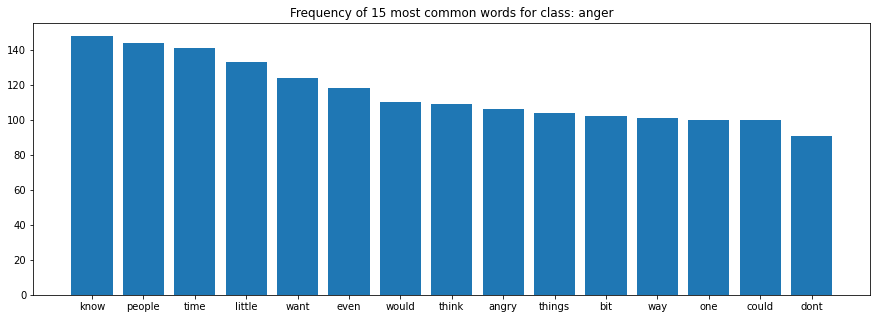

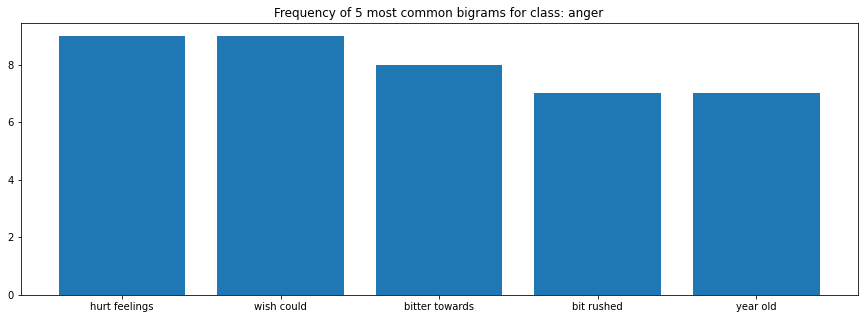

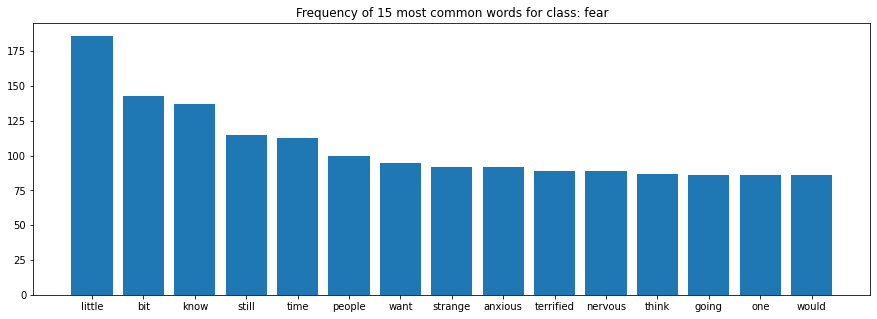

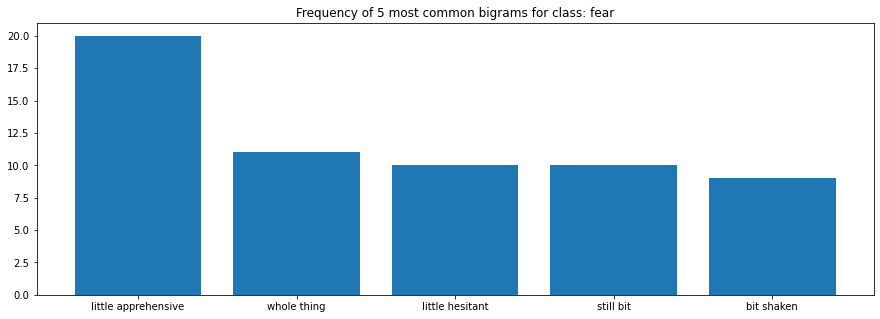

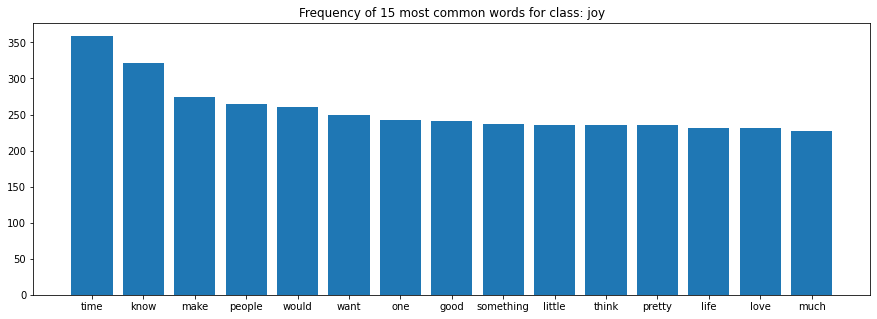

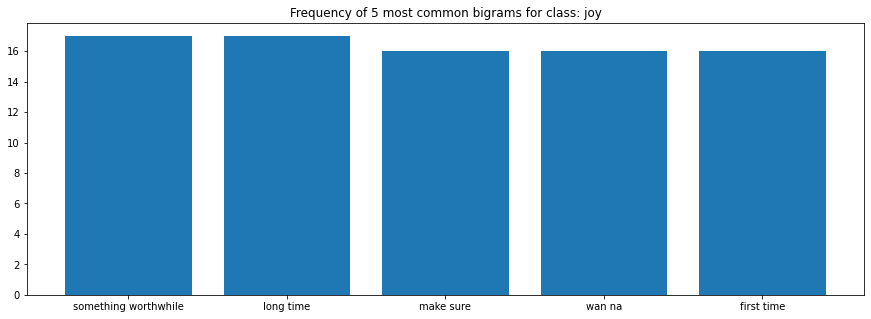

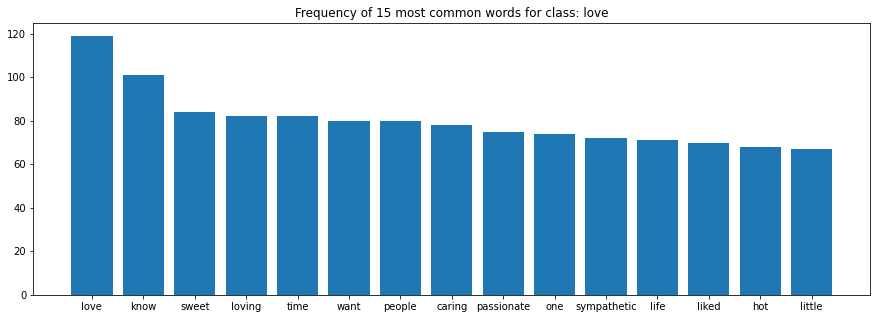

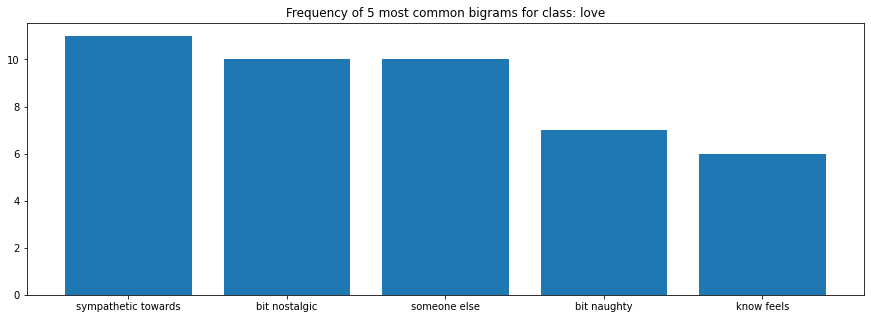

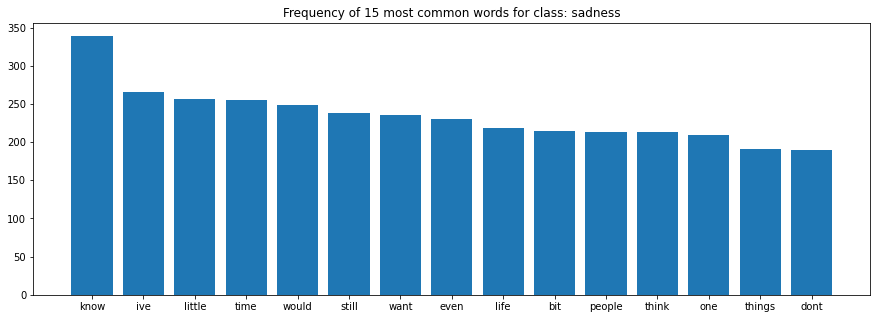

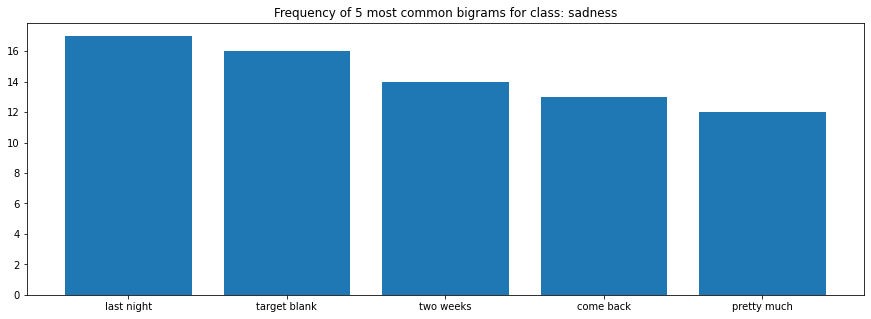

In [14]:
for emotion in emotion_label_list:
    text_input_em = []
    text_input_em = (' '.join([text for text in df.loc[df['Emotion'] == emotion,'Sentence']]))
    stop_words = set(stopwords.words('english'))
    
    # Eliminating few more unrelevant words. 
    stop_words.add('feel')
    stop_words.add('feeling')
    stop_words.add('like')
    stop_words.add('im')
    stop_words.add('really')
    stop_words.add('get')
    stop_words.add('http')
    stop_words.add('href')
    stop_words.add('www')
    
    word_tokens = word_tokenize(text_input_em)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    frequency = Counter(filtered_sentence).most_common(15)
    frequent_bigrams = generate_common_N_grams(filtered_sentence,2,5)
    plt.figure(figsize=(15, 5))
    
    # Visualizing most common words
    a_str = 'Frequency of 15 most common words for class: ' + emotion
    b_str = 'Frequency of 5 most common bigrams for class: ' + emotion
    plt.title(a_str)
    plt.bar(*zip(*frequency))
    plt.show()
    
    plt.figure(figsize=(15, 5))
    # Visualizing most common bigrams
    plt.title(b_str)
    plt.bar(*zip(*frequent_bigrams))
    plt.show()


In [15]:
# Encoding labels to numbers
label_encoder = preprocessing.LabelEncoder()
df['Emotion']= label_encoder.fit_transform(df['Emotion']) 
df['Emotion'].value_counts()

2    6761
4    5797
0    2709
1    2373
3    1641
Name: Emotion, dtype: int64

In [16]:
# max length amongs all the sentences
max_length = 0
len_list = []
for value in df['Sentence']:
    len_list.append(len(value))
print(max(len_list))

300


In [17]:
# Data Cleaning continues
stopwords = set(stopwords.words('english'))
stemmer = PorterStemmer()

def count_words(user_input):
    num_words = 0
    tokens = nltk.tokenize.word_tokenize(user_input)
    for word in tokens:
         if word not in string.punctuation:
            num_words += 1
    return num_words

def get_tokens(inp_str):
    inp_str = inp_str.lower()
    return inp_str.split()

def remove_numbers(input_str):
    return re.sub("[^a-zA-Z]", " ", input_str)

def pre_process(dataframe, column):
    
    tokens_processed = []    
    for sentence in dataframe[column]:
        text_inp = remove_numbers(sentence)
        words = get_tokens(sentence)
        words = [stemmer.stem(w) for w in words if w not in stopwords and w not in string.punctuation]
        words = " ".join(words)
        tokens_processed.append(words)
        
    return tokens_processed
    

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
vectorizer = CountVectorizer(stop_words='english', max_df=0.5, min_df=3, ngram_range=(1,1),tokenizer = token.tokenize)

df['Processed_Sentence'] = pre_process(df, 'Sentence')
X = vectorizer.fit_transform(df.Processed_Sentence)
Y = df.Emotion.values
print(Y.shape)

(19281,)


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Modelling

In [19]:
# Logistic Regression model
model_1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 500, random_state = 0)
model_1.fit(X_train, Y_train)

Y_pred = model_1.predict(X_test)
Y_pred_train = model_1.predict(X_train)

print(Y_pred[:10])
print(Y_test[:10])

print('\nMean squared error for test: %.2f'% mean_squared_error(Y_test, Y_pred))
print('\nMean squared error for train: %.2f'% mean_squared_error(Y_train, Y_pred_train))

# Display the outcome of classification
print("\nClassification Report:\n ",classification_report(Y_test, Y_pred))
print("\nConfusion matrix:\n",confusion_matrix(Y_test, Y_pred))
print("\nAccuracy:\n",accuracy_score(Y_test, Y_pred))

[2 3 3 2 4 3 1 1 3 4]
[2 3 3 2 4 3 1 1 3 4]

Mean squared error for test: 0.69

Mean squared error for train: 0.17

Classification Report:
                precision    recall  f1-score   support

           0       0.86      0.82      0.84       556
           1       0.86      0.86      0.86       448
           2       0.88      0.90      0.89      1382
           3       0.74      0.69      0.71       318
           4       0.89      0.90      0.89      1153

    accuracy                           0.87      3857
   macro avg       0.85      0.83      0.84      3857
weighted avg       0.86      0.87      0.87      3857


Confusion matrix:
 [[ 454   16   24    6   56]
 [  21  384   18    5   20]
 [  18   21 1243   52   48]
 [  10    2   78  219    9]
 [  26   23   51   13 1040]]

Accuracy:
 0.8659579984443868


In [20]:
# Decision Tree Classifier
model_2 = tree.DecisionTreeClassifier()
model_2.fit(X_train, Y_train)

Y_pred = model_2.predict(X_test)
Y_pred_train = model_2.predict(X_train)

print(Y_pred[:10])
print(Y_test[:10])

print('\nMean squared error for test: %.2f'% mean_squared_error(Y_test, Y_pred))
print('\nMean squared error for train: %.2f'% mean_squared_error(Y_train, Y_pred_train))

#Display the outcome of classification
print("\nClassification Report:\n ",classification_report(Y_test, Y_pred))
print("\nConfusion matrix:\n",confusion_matrix(Y_test, Y_pred))
print("\nAccuracy:\n",accuracy_score(Y_test, Y_pred))

[2 3 3 3 4 2 1 1 3 4]
[2 3 3 2 4 3 1 1 3 4]

Mean squared error for test: 0.88

Mean squared error for train: 0.01

Classification Report:
                precision    recall  f1-score   support

           0       0.77      0.84      0.80       556
           1       0.77      0.86      0.81       448
           2       0.88      0.76      0.82      1382
           3       0.57      0.68      0.62       318
           4       0.85      0.87      0.86      1153

    accuracy                           0.81      3857
   macro avg       0.77      0.80      0.78      3857
weighted avg       0.82      0.81      0.81      3857


Confusion matrix:
 [[ 466   21   16    8   45]
 [  23  384   17    5   19]
 [  54   49 1056  125   98]
 [  13    1   73  215   16]
 [  47   41   38   24 1003]]

Accuracy:
 0.8099559242934924


In [21]:
# KNN algorithm
model_3 = KNeighborsClassifier(n_neighbors=5)
model_3.fit(X_train, Y_train)

# make predictions on test data
Y_pred = model_3.predict(X_test)

print(Y_pred[:10])
print(Y_test[:10])

# measure the performance of the model
mse_test = mean_squared_error(Y_test, Y_pred)

# measure the performance of the model on train set
Y_pred_train = model_3.predict(X_train)
mse_train = mean_squared_error(Y_train, Y_pred_train)

print('\nMean squared error for test: %.2f'% mse_test)
print('\nMean squared error for train: %.2f'% mse_train)

# Display the outcome of classification
print("\nClassification Report:\n ",classification_report(Y_test, Y_pred))
print("\nConfusion matrix:\n",confusion_matrix(Y_test, Y_pred))
print("\nAccuracy:\n",accuracy_score(Y_test, Y_pred))

[1 4 3 3 4 3 1 2 4 2]
[2 3 3 2 4 3 1 1 3 4]

Mean squared error for test: 1.64

Mean squared error for train: 0.87

Classification Report:
                precision    recall  f1-score   support

           0       0.64      0.64      0.64       556
           1       0.63      0.62      0.62       448
           2       0.70      0.75      0.73      1382
           3       0.46      0.57      0.51       318
           4       0.74      0.63      0.68      1153

    accuracy                           0.67      3857
   macro avg       0.64      0.64      0.64      3857
weighted avg       0.68      0.67      0.67      3857


Confusion matrix:
 [[ 357   30   75   21   73]
 [  41  276   60   17   54]
 [  57   62 1043  118  102]
 [  15   15   86  181   21]
 [  86   57  229   53  728]]

Accuracy:
 0.6702100077780658


In [22]:
# Linear SVM
model_4 = svm.SVC(kernel = 'linear')
model_4.fit(X_train, Y_train)

# make predictions on test data
Y_pred = model_4.predict(X_test)

print(Y_pred[:10])
print(Y_test[:10])

# measure the performance of the model
mse_test = mean_squared_error(Y_test, Y_pred)

# measure the performance of the model on train set
Y_pred_train = model_4.predict(X_train)
mse_train = mean_squared_error(Y_train, Y_pred_train)

print('\nMean squared error for test: %.2f'% mse_test)
print('\nMean squared error for train: %.2f'% mse_train)

# Display the outcome of classification
print("\nClassification Report:\n ",classification_report(Y_test, Y_pred))
print("\nConfusion matrix:\n",confusion_matrix(Y_test, Y_pred))
print("\nAccuracy:\n",accuracy_score(Y_test, Y_pred))

[2 3 3 2 4 3 1 1 3 4]
[2 3 3 2 4 3 1 1 3 4]

Mean squared error for test: 0.73

Mean squared error for train: 0.12

Classification Report:
                precision    recall  f1-score   support

           0       0.83      0.86      0.84       556
           1       0.83      0.87      0.85       448
           2       0.88      0.87      0.87      1382
           3       0.69      0.67      0.68       318
           4       0.89      0.88      0.88      1153

    accuracy                           0.85      3857
   macro avg       0.82      0.83      0.83      3857
weighted avg       0.85      0.85      0.85      3857


Confusion matrix:
 [[ 476   12   13    3   52]
 [  22  391   14    4   17]
 [  33   33 1199   69   48]
 [  12    3   82  213    8]
 [  33   32   58   19 1011]]

Accuracy:
 0.852994555353902


In [23]:
# Non-Linear SVM
model_5 = svm.SVC(kernel = 'rbf')
model_5.fit(X_train, Y_train)

# make predictions on test data
Y_pred = model_5.predict(X_test)

print(Y_pred[:10])
print(Y_test[:10])

# measure the performance of the model
mse_test = mean_squared_error(Y_test, Y_pred)

# measure the performance of the model on train set
Y_pred_train = model_5.predict(X_train)
mse_train = mean_squared_error(Y_train, Y_pred_train)

print('\nMean squared error for test: %.2f'% mse_test)
print('\nMean squared error for train: %.2f'% mse_train)

# Display the outcome of classification
print("\nClassification Report:\n ",classification_report(Y_test, Y_pred))
print("\nConfusion matrix:\n",confusion_matrix(Y_test, Y_pred))
print("\nAccuracy:\n",accuracy_score(Y_test, Y_pred))

[2 3 2 2 4 3 1 2 2 2]
[2 3 3 2 4 3 1 1 3 4]

Mean squared error for test: 0.87

Mean squared error for train: 0.14

Classification Report:
                precision    recall  f1-score   support

           0       0.86      0.71      0.78       556
           1       0.87      0.71      0.79       448
           2       0.79      0.92      0.85      1382
           3       0.76      0.53      0.62       318
           4       0.85      0.88      0.86      1153

    accuracy                           0.82      3857
   macro avg       0.83      0.75      0.78      3857
weighted avg       0.82      0.82      0.82      3857


Confusion matrix:
 [[ 396    5   67    3   85]
 [  25  320   68    3   32]
 [  16   17 1273   32   44]
 [   4    1  125  169   19]
 [  17   23   85   16 1012]]

Accuracy:
 0.8218822919367385


In [24]:
# Multilayer perceptron
model_6 = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

model_6.fit(X_train, Y_train)

# make predictions on test data
Y_pred = model_6.predict(X_test)

print(Y_pred[:10])
print(Y_test[:10])

# measure the performance of the model
mse_test = mean_squared_error(Y_test, Y_pred)

Y_pred_train = model_6.predict(X_train)
mse_train = mean_squared_error(Y_train, Y_pred_train)

print('\nMean squared error for test: %.2f'% mse_test)
print('\nMean squared error for train: %.2f'% mse_train)

# Display the outcome of classification
print("\nClassification Report:\n ",classification_report(Y_test, Y_pred))
print("\nConfusion matrix:\n",confusion_matrix(Y_test, Y_pred))
print("\nAccuracy:\n",accuracy_score(Y_test, Y_pred))

[2 3 3 2 4 3 1 1 3 4]
[2 3 3 2 4 3 1 1 3 4]

Mean squared error for test: 0.83

Mean squared error for train: 0.01

Classification Report:
                precision    recall  f1-score   support

           0       0.80      0.83      0.81       556
           1       0.79      0.86      0.83       448
           2       0.88      0.86      0.87      1382
           3       0.65      0.69      0.67       318
           4       0.89      0.85      0.87      1153

    accuracy                           0.84      3857
   macro avg       0.80      0.82      0.81      3857
weighted avg       0.84      0.84      0.84      3857


Confusion matrix:
 [[ 460   22   24   10   40]
 [  21  387   16    5   19]
 [  29   34 1186   78   55]
 [  17    6   65  220   10]
 [  49   39   63   24  978]]

Accuracy:
 0.8376976925071299


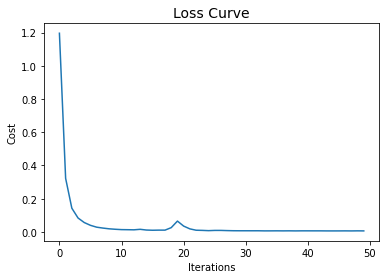

In [25]:
#Plotting loss curve for multilayer perceptron
plt.plot(model_6.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [26]:
X_train.shape

(15424, 4156)

In [27]:
X_train_numpy = X_train.toarray()
X_test_numpy = X_test.toarray()

In [28]:
type(X_test_numpy)

numpy.ndarray

In [29]:
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.models import Sequential
print(X_train_numpy.shape)
print(X_test_numpy.shape)
print(Y_train.shape)
print(Y_test.shape)


(15424, 4156)
(3857, 4156)
(15424,)
(3857,)


In [30]:
model_7 = Sequential()
model_7.add(Embedding(input_dim=15424, output_dim=150, input_length= 4156))
model_7.add(LSTM(128))
model_7.add(Dropout(0.2))
model_7.add(Dense(64, activation='relu'))
model_7.add(Dropout(0.2))
model_7.add(Dense(5, activation='softmax'))
model_7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4156, 150)         2313600   
                                                                 
 lstm (LSTM)                 (None, 128)               142848    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 2,465,029
Trainable params: 2,465,029
Non-

In [31]:
import tensorflow as tf
eval_metrics = [tf.keras.metrics.CategoricalAccuracy(name="accuracy")]
model_7.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics= eval_metrics)
#hist = model_7.fit(X_train_numpy, Y_train, epochs= 1, batch_size = 64)